 ## Your Datasets

 OK, now you need to find a dataset of your own!

 Goto www.kaggle.com and find a suitable dataset, that you want to work with. We want a set somewhat larger that iris or nmist but it should not be too big.

 You need to create an account at Kaggle before you download.

 One example could be the beer consumption in Sao Paulo:

 > https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo/version/2

 It is a 'small-data' set, download gives a 5Kb comma-separated file (CSV)...


 #### Qg Download a data set and do some data exploration of it

 You are now a Data Scientist, go an examine your data, perhaps creating some feature scatter plots, just like the ones we just made for iris...

 Are there `null`s or not-a-number data in your set? Do you have to filter these out before training?

 Try to train-test split the set, perhaps just on a small set of its feature depending on the size of your data (small/medium/large/big), and try out one or two Scikit-learn ML algorithms on it just to see if it is possible.

 (We return to the data set and training later...)

In [1]:
# TODO: Qg

import pandas as pd
import os

# Download and clean the data
print('Working directory: ' + os.getcwd())

coffee_data = pd.read_csv('Data/CoffeeAndCodeLT2018.csv')

print('Shape of raw CoffeeAndCodeLT2018.csv before preparing: ', coffee_data.shape)

cleaned_data = coffee_data.dropna()

print('Shape of Coffee Data after dropping columns with fields without values: ', cleaned_data.shape)

cleaned_data = coffee_data.drop("Country", axis=1) # Only one country
cleaned_data = cleaned_data.drop("AgeRange", axis=1) # Not gonna look at this
cleaned_data = cleaned_data.drop("CoffeeType", axis=1) # Not gonna look at this
cleaned_data = cleaned_data.drop("Gender", axis=1) # Not gonna look at this
cleaned_data = cleaned_data.drop("CodingWithoutCoffee", axis=1) # Not gonna look at this

print('Shape of Coffee Data after dropping columns we are not going to look at: ', cleaned_data.shape)

print('\nData sample: ')
cleaned_data.sample(5)

Working directory: c:\Users\Simon\Documents\MachineLearning\itmal_solving\L03
Shape of raw CoffeeAndCodeLT2018.csv before preparing:  (100, 9)
Shape of Coffee Data after dropping columns with fields without values:  (97, 9)
Shape of Coffee Data after dropping columns we are not going to look at:  (100, 4)

Data sample: 


,CodingHours,CoffeeCupsPerDay,CoffeeTime,CoffeeSolveBugs
9,10,2,While coding,No
46,2,1,While coding,No
57,10,8,While coding,Sometimes
25,6,3,While coding,No
18,8,3,While coding,No


In [3]:
# Transform data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

## Bugs solved by coffee encoding

coffee_bugs_cat = cleaned_data["CoffeeSolveBugs"]

coffee_bugs_encoded = encoder.fit_transform(coffee_bugs_cat)

print('Encoded classes:', encoder.classes_)
print('Encoded array:', coffee_bugs_encoded)

cleaned_data["CoffeeSolveBugs"] = coffee_bugs_encoded

cleaned_data.sample(1)



Encoded classes: [0 1 2]
Encoded array: [1 2 2 2 0 2 1 1 1 0 1 2 2 2 1 2 1 1 0 1 1 2 1 0 1 0 0 2 2 1 2 1 1 0 1 0 1
 2 2 0 0 2 1 0 1 0 0 0 0 0 0 2 2 0 1 1 1 1 0 1 0 1 1 2 1 1 0 2 2 0 2 2 2 1
 2 0 1 1 0 2 0 1 2 1 0 1 1 1 2 1 1 1 2 0 1 2 1 2 1 1]


,CodingHours,CoffeeCupsPerDay,CoffeeTime,CoffeeSolveBugs
41,8,4,While coding,2


In [4]:
# One hot encoding for CoffeeTime
from sklearn.preprocessing import OneHotEncoder

coffee_time_cat = cleaned_data["CoffeeTime"]

coffee_time_cat_encoded = encoder.fit_transform(coffee_time_cat)

print('Encoded classes:', encoder.classes_)
print('Encoded array:', coffee_time_cat_encoded)

hotencoder = OneHotEncoder()
coffee_time_cat_1hot = hotencoder.fit_transform(coffee_time_cat_encoded.reshape(-1,1))
print('Encoded 1hot number categories:', hotencoder.categories_) # the classes are here renamed to number categories
coffee_time_1hot_arr = coffee_time_cat_1hot.toarray()
print('Encoded 1hot array:', coffee_time_1hot_arr)

prepared_coffee = cleaned_data.drop("CoffeeTime", axis=1) # Change out with 1hot

## Insert new columns
prepared_coffee['AfterCoding'] = coffee_time_1hot_arr[0:,0]
prepared_coffee['AllTheTime'] = coffee_time_1hot_arr[0:,1]
prepared_coffee['BeforeAndWhileCoding'] = coffee_time_1hot_arr[0:,2]
prepared_coffee['BeforeCoding'] = coffee_time_1hot_arr[0:,3]
prepared_coffee['InTheMorning'] = coffee_time_1hot_arr[0:,4]
prepared_coffee['NoSpecificTime'] = coffee_time_1hot_arr[0:,5]
prepared_coffee['WhileCoding'] = coffee_time_1hot_arr[0:,6]
prepared_coffee.sample(1)
#


Encoded classes: ['After coding' 'All the time' 'Before and while coding' 'Before coding'
 'In the morning' 'No specific time' 'While coding']
Encoded array: [3 3 6 3 6 6 6 3 6 6 6 3 2 6 3 6 6 6 6 4 6 6 6 6 6 6 3 6 3 6 1 6 3 3 6 6 1
 0 6 6 6 6 6 6 0 6 6 4 3 3 3 6 3 6 5 2 6 6 6 6 3 6 6 3 6 3 4 6 2 6 6 1 6 2
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 3 3 6 3 3 6 3 3 3 6 3]
Encoded 1hot number categories: [array([0., 1., 2., 3., 4., 5., 6.])]
Encoded 1hot array: [[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 

c:\users\simon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,CodingHours,CoffeeCupsPerDay,CoffeeSolveBugs,AfterCoding,AllTheTime,BeforeAndWhileCoding,BeforeCoding,InTheMorning,NoSpecificTime,WhileCoding
35,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


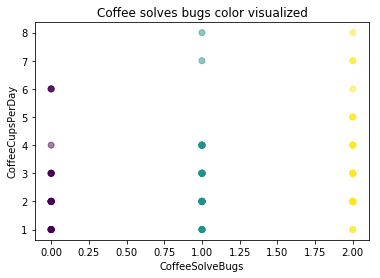

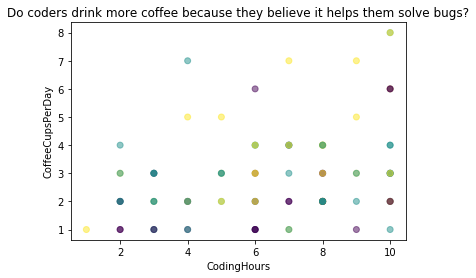

In [8]:
import matplotlib.pyplot as plt

def coffee_plot(x, y, title, color_val):
    plt.scatter(x,y, alpha=0.5, c=color_val)
    plt.title(title)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

coffee_plot(prepared_coffee['CoffeeSolveBugs'], prepared_coffee['CoffeeCupsPerDay'], 'Coffee solves bugs color visualized', coffee_bugs_encoded)
coffee_plot(prepared_coffee['CodingHours'], prepared_coffee['CoffeeCupsPerDay'], 'Do coders drink more coffee because they believe it helps them solve bugs?', coffee_bugs_encoded)




In [16]:
# split test set
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier, LinearRegression

y = prepared_coffee['CodingHours']
X = prepared_coffee

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("X_train.shape=",X_train.shape,", X_test.shape=",X_test.shape)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(X_train['CodingHours'], y_pred)
print('Lin MSE', lin_mse) # 1.932709217791479e-30 means there are close to no errors


X_train.shape= (75, 10) , X_test.shape= (25, 10)
Lin MSE 1.932709217791479e-30


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics
## Confusion matrix
clf = SGDClassifier(random_state=42)
print('Testing', clf.__class__.__name__,)

clf.fit(X_train, y_train)

y_pred = cross_val_predict(clf, X_test, y_test, cv=3)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.show()

def clf_score(scoring_method, y_tester, y_prediction):
    score = scoring_method(y_tester, y_prediction)
    print(scoring_method.__name__, ": ", score)

clf_score(accuracy_score, y_test, y_pred)
#clf_score(precision_score, y_test, y_pred)
#clf_score(recall_score, y_test, y_pred)
#clf_score(f1_score, y_test, y_pred)

#

